In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salesdata/SalesDataAnalysis.ipynb
/kaggle/input/salesdata/sales_data.csv


In [12]:
# loading the dataset into a pandas DataFrame 
df = pd.read_csv('/kaggle/input/salesdata/sales_data.csv')

In [61]:
# copying the DataFrame into a variable, this keeps the original DataFrame intact
df2 = df.copy()

In [62]:
# Displays the first five rows of the DataFrame
df2.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [63]:
# displays the column names in the DataFrame
df2.columns

Index(['Order Date', 'Order ID', 'Product', 'Product_ean', 'catégorie',
       'Purchase Address', 'Quantity Ordered', 'Price Each', 'Cost price',
       'turnover', 'margin'],
      dtype='object')

In [64]:
# displays the number of rows ,and columns in the DataFrame
df2.shape

(185950, 11)

In [65]:
# displays column name, datatypes, non-null values count and memory usage
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


There are no null values in the DataFrame

In [67]:
# displays statistical summary of numerical columns in the DataFrame
df2.describe()

,Order ID,Product_ean,Quantity Ordered,Price Each,Cost price,turnover,margin
count,185950.000000,1.859500e+05,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,5.509211e+12,1.124383,184.399735,69.668583,185.490917,115.289422
std,51512.737110,2.598403e+12,0.442793,332.731330,109.424191,332.919771,225.227190
min,141234.000000,1.000083e+12,1.000000,2.990000,1.495000,2.990000,1.495000
25%,185831.250000,3.254280e+12,1.000000,11.950000,5.975000,11.950000,5.975000
50%,230367.500000,5.511235e+12,1.000000,14.950000,7.475000,14.950000,7.475000
75%,275035.750000,7.765195e+12,1.000000,150.000000,97.500000,150.000000,52.500000
max,319670.000000,9.999983e+12,9.000000,1700.000000,561.000000,3400.000000,2278.000000


In [68]:
# All the products in this dataset are electronic gadgets so no product belongs to 'Vêtements': 'Clothing', 'Alimentation': 'Groceries', 'Sports': 'Sports', categories
df2.Product.unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [70]:
# dropping duplicated values, if there are any
df3 = df2.drop_duplicates()

# Data cleaning

In [71]:
# using the 'Order ID' column as index
df3 = df3.set_index('Order ID')

# Order date is converted to datetime format
df3['Order Date'] = pd.to_datetime(df3['Order Date'], format='%Y-%m-%d %H:%M:%S')

df3['Order_year'] = df3['Order Date'].dt.year
df3['Order_month'] = df3['Order Date'].dt.month
df3['Order_day'] = df3['Order Date'].dt.day
df3['Order_hour'] = df3['Order Date'].dt.hour
df3['Order_minute'] = df3['Order Date'].dt.minute
df3['Order_second'] = df3['Order Date'].dt.second

df3 = df3.drop(['Order Date','Order_second'], axis=1)


# product_ean
df3['Product_European_Article_Number'] = df3['Product_ean']
df3 = df3.drop('Product_ean', axis =1)

# category
#dict_1 = {'Vêtements': 'Clothing', 'Alimentation': 'Groceries', 'Sports': 'Sports', 'Électronique': 'Electronics'}
# All the products in this dataset are electronics so we can classify them all as 'Electronics' in the 'category' column
dict_2 = {'Vêtements': 'Electronics', 'Alimentation': 'Electronics', 'Sports': 'Electronics', 'Électronique': 'Electronics'}

df3['category'] = df3['catégorie'].replace(dict_2)
df3['category'] = df3['category'].astype('category')
df3 = df3.drop('catégorie', axis=1)


# purcahse address
df3[['purchase_street','purchase_city', 'abv']] = df3['Purchase Address'].str.split(',', n=2, expand=True)
df3 = df3.drop('Purchase Address', axis=1)



In [72]:
# Displays five random rows in the DataFrame
df3.sample(5)

,Product,Quantity Ordered,Price Each,Cost price,turnover,margin,Order_year,Order_month,Order_day,Order_hour,Order_minute,Product_European_Article_Number,category,purchase_street,purchase_city,abv
Order ID,,,,,,,,,,,,,,,,
286998,34in Ultrawide Monitor,1,379.99,125.3967,379.99,254.5933,2019,11,4,21,22,4.656067e+12,Electronics,361 12th St,New York City,NY 10001
242970,AA Batteries (4-pack),1,3.84,1.9200,3.84,1.9200,2019,8,6,9,34,7.484197e+12,Electronics,455 North St,New York City,NY 10001
311580,AA Batteries (4-pack),1,3.84,1.9200,3.84,1.9200,2019,12,25,17,6,4.292834e+12,Electronics,64 Cedar St,San Francisco,CA 94016
293968,USB-C Charging Cable,2,11.95,5.9750,23.90,11.9500,2019,11,30,12,15,7.735962e+12,Electronics,927 10th St,San Francisco,CA 94016
147313,27in 4K Gaming Monitor,1,389.99,128.6967,389.99,261.2933,2019,1,2,23,36,5.119459e+12,Electronics,537 Park St,Los Angeles,CA 90001


In [74]:
# All the products in the DataFrame are electronics
items = ['Product','category']
df3[items]

,Product,category
Order ID,,
141234,iPhone,Electronics
141235,Lightning Charging Cable,Electronics
141236,Wired Headphones,Electronics
141237,27in FHD Monitor,Electronics
141238,Wired Headphones,Electronics
...,...,...
319666,Lightning Charging Cable,Electronics
319667,AA Batteries (4-pack),Electronics
319668,Vareebadd Phone,Electronics


In [76]:
df3.describe()

,Quantity Ordered,Price Each,Cost price,turnover,margin,Order_year,Order_month,Order_day,Order_hour,Order_minute,Product_European_Article_Number
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,1.859500e+05
mean,1.124383,184.399735,69.668583,185.490917,115.289422,2019.000183,7.059140,15.759532,14.413305,29.481361,5.509211e+12
std,0.442793,332.731330,109.424191,332.919771,225.227190,0.013521,3.502996,8.782176,5.423416,17.317573,2.598403e+12
min,1.000000,2.990000,1.495000,2.990000,1.495000,2019.000000,1.000000,1.000000,0.000000,0.000000,1.000083e+12
25%,1.000000,11.950000,5.975000,11.950000,5.975000,2019.000000,4.000000,8.000000,11.000000,14.000000,3.254280e+12
50%,1.000000,14.950000,7.475000,14.950000,7.475000,2019.000000,7.000000,16.000000,15.000000,29.000000,5.511235e+12
75%,1.000000,150.000000,97.500000,150.000000,52.500000,2019.000000,10.000000,23.000000,19.000000,45.000000,7.765195e+12
max,9.000000,1700.000000,561.000000,3400.000000,2278.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,9.999983e+12


# Visualization

In [77]:
# importing matplotlib and seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

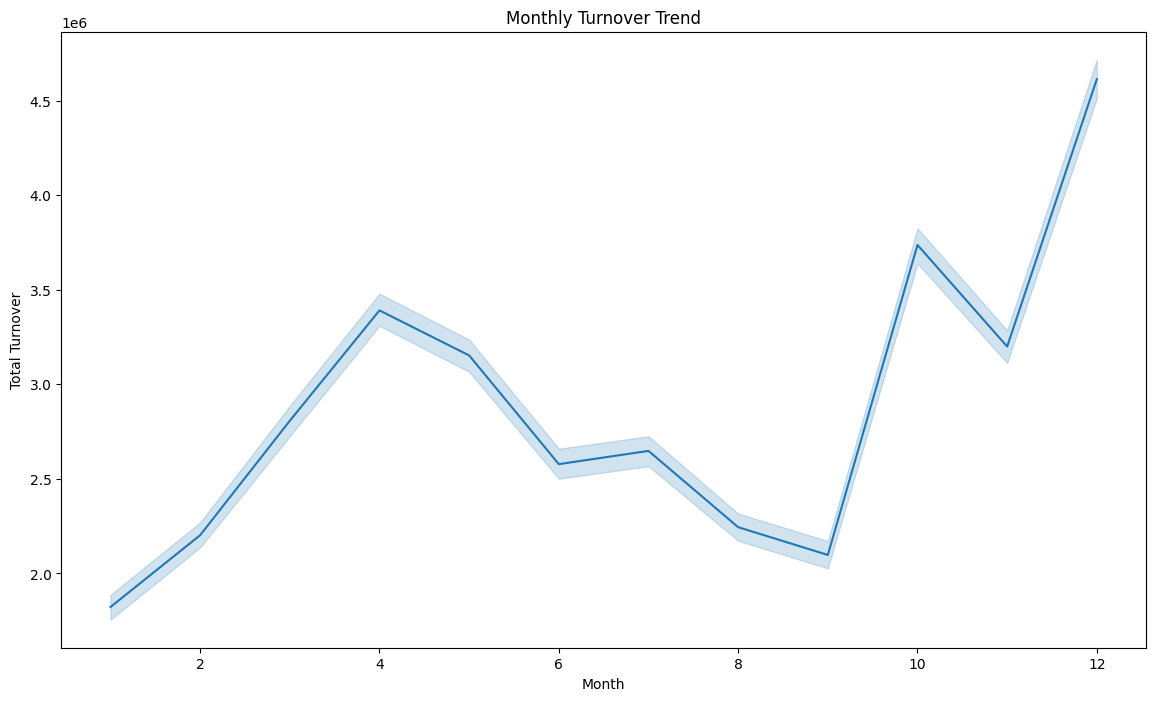

In [79]:
# Time Series Analysis (Monthly Turnover Trend - Line Plot)
plt.figure(figsize=(14, 8))
sns.lineplot(x='Order_month', y='turnover', data=df3, estimator=sum)
plt.xlabel('Month')
plt.ylabel('Total Turnover')
plt.title('Monthly Turnover Trend')
plt.show()

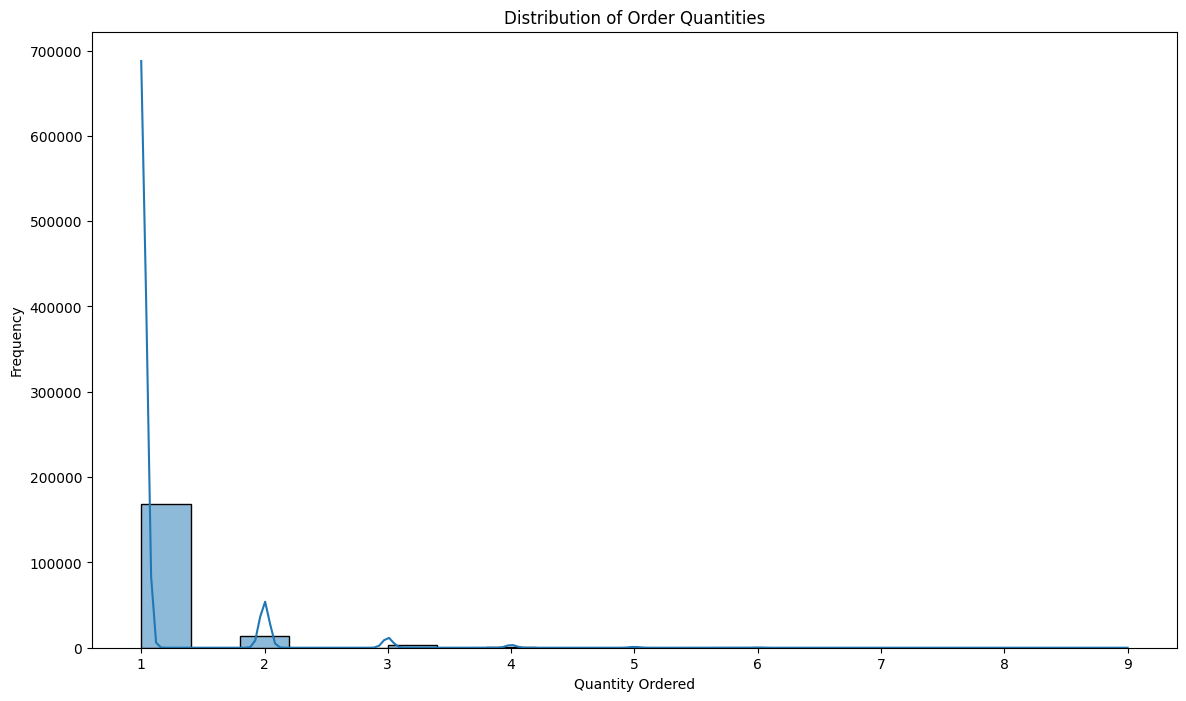

In [80]:
# 3. Distribution of Order Quantities
plt.figure(figsize=(14, 8))
sns.histplot(df3['Quantity Ordered'], bins=20, kde=True)
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantities')
plt.show()

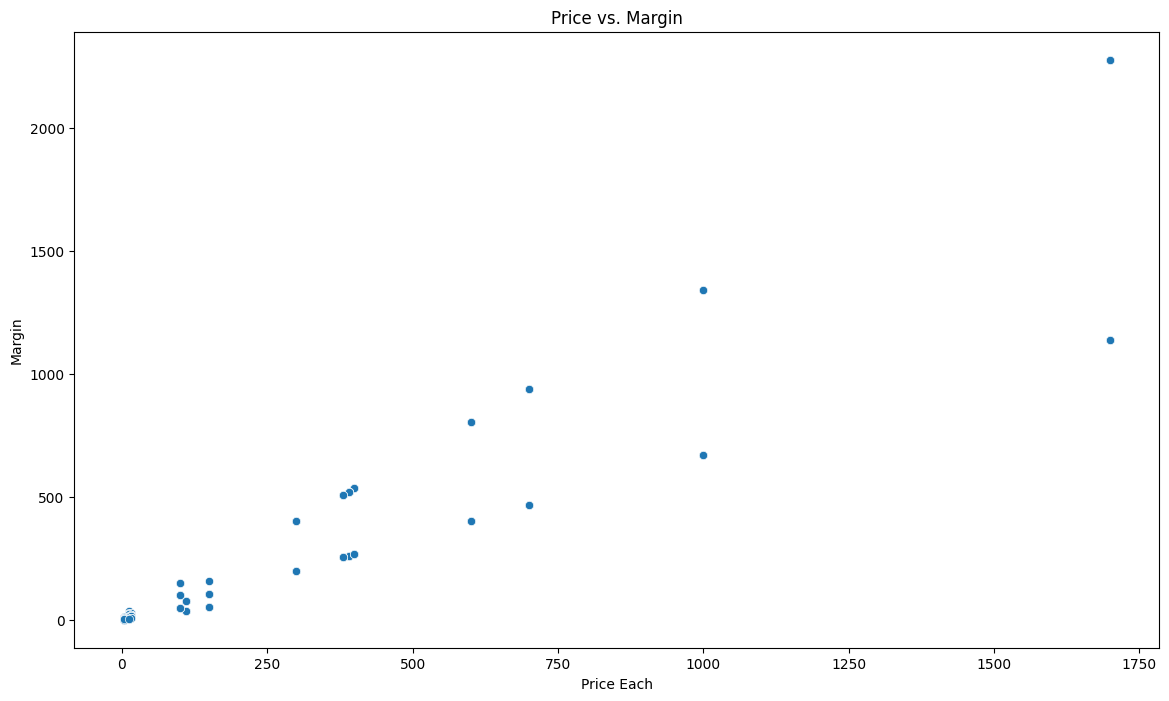

In [81]:
# 4. Price vs. Margin
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Price Each', y='margin', data=df3)
plt.xlabel('Price Each')
plt.ylabel('Margin')
plt.title('Price vs. Margin')
plt.show()

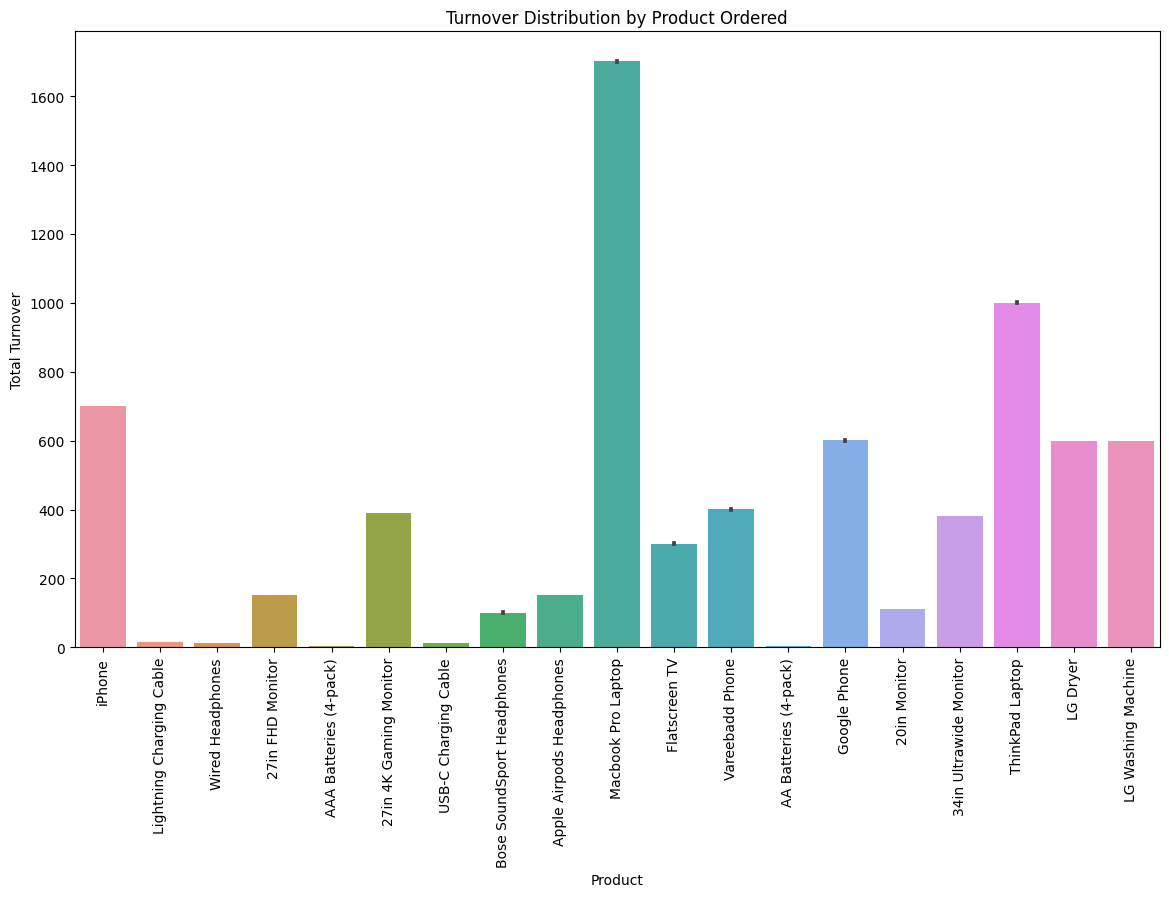

In [83]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Product', y='turnover', data=df3)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Total Turnover')
plt.title('Turnover Distribution by Product Ordered')
plt.show()

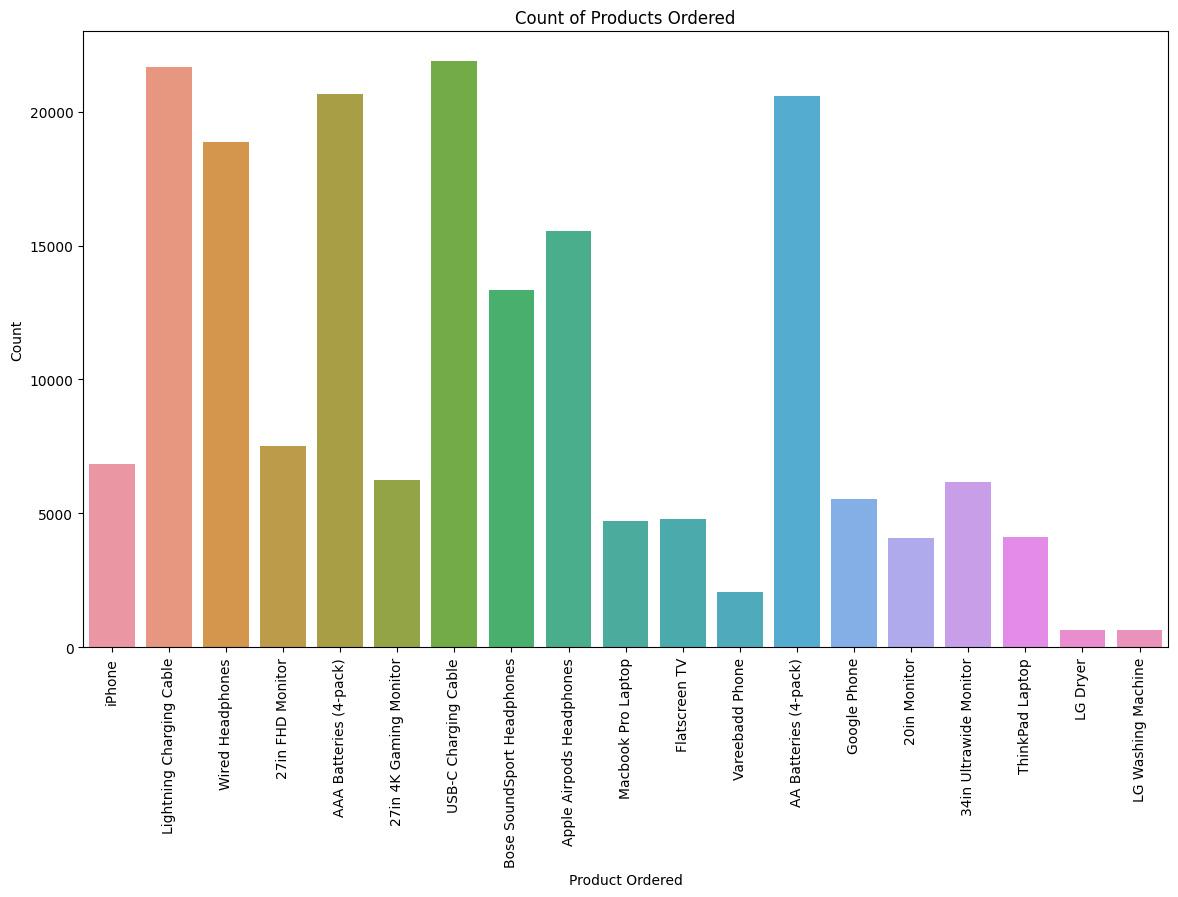

In [84]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Product', data=df3)
plt.xticks(rotation=90)
plt.xlabel('Product Ordered')
plt.ylabel('Count')
plt.title('Count of Products Ordered')
plt.show()

In [85]:
df3['purchase_city'].unique()

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

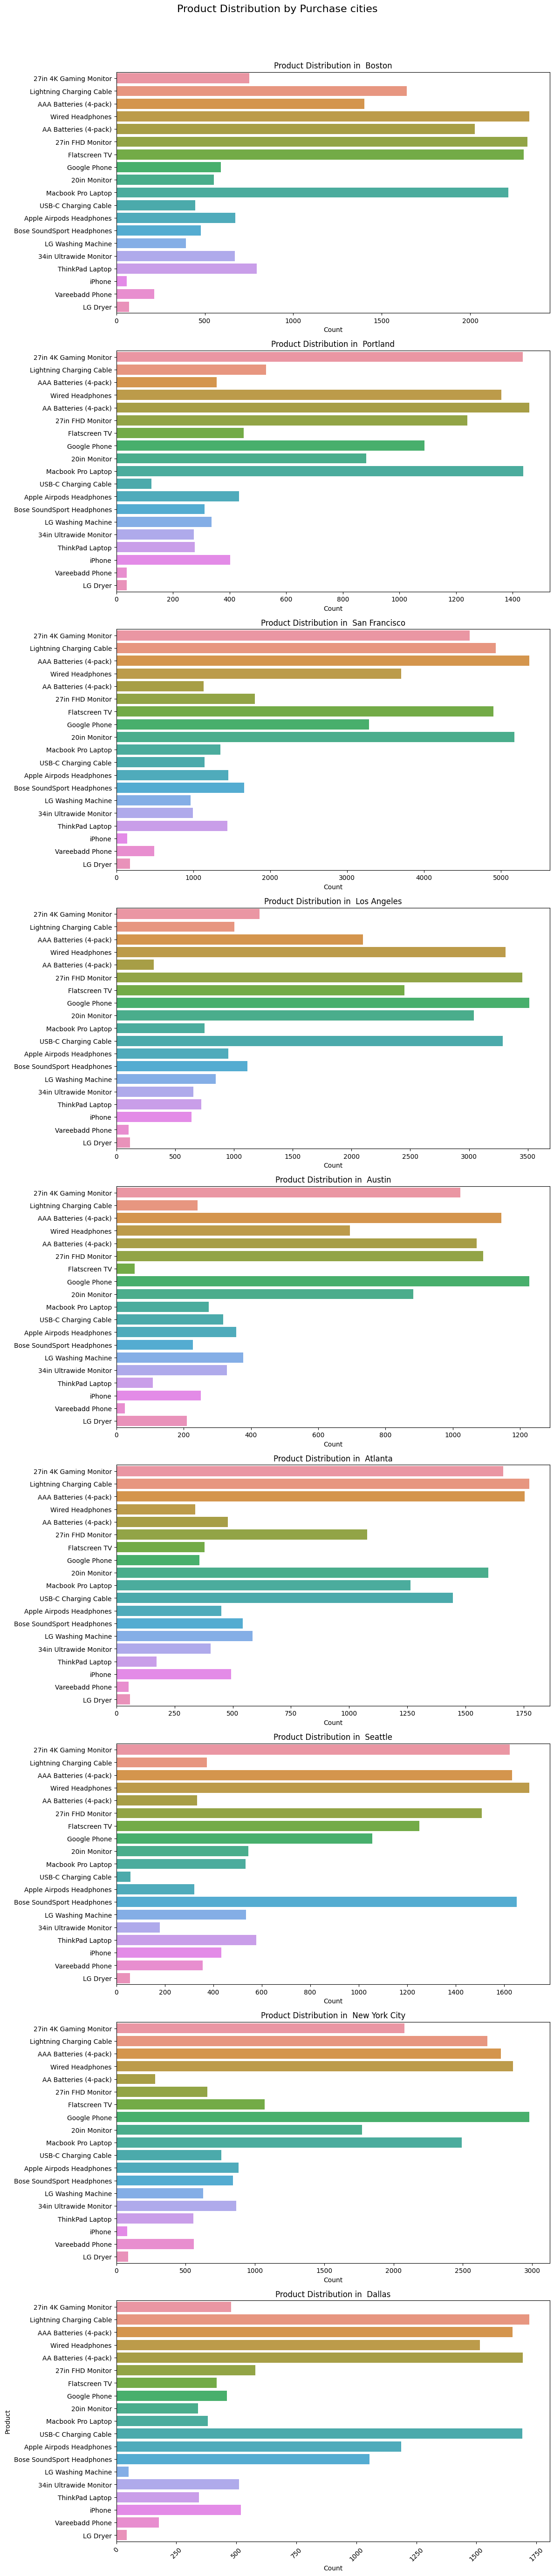

In [86]:
# list of unique purchase cities
unique_cities = df3['purchase_city'].unique()

#subplots for each city
num_cities = len(unique_cities)
fig, axes = plt.subplots(num_cities, 1, figsize=(12, 6 * num_cities), sharey=True)

# countplot for each city
for i, city in enumerate(unique_cities):
    cities_df = df3[df3['purchase_city'] == city]
    ax = sns.countplot(y='Product', data=cities_df, ax=axes[i])
    ax.set_title(f'Product Distribution in {city}')
    ax.set_ylabel('')
    ax.set_xlabel('Count')

#labels and a title 
plt.ylabel('Product')
plt.tight_layout()
plt.suptitle('Product Distribution by Purchase cities', y=1.02, fontsize=16)

# Show the plots
plt.xticks(rotation=45)
plt.show()


There are likely many hidden insights in this dataset. However,data analysis is an ongoing process, and I believe there's still more to uncover. I invite you to delve into the data and contribute your insights to this notebook. Together, we can unlock the full potentials of the dataset and gain valuable knowledge from it.

Thank you for exploring this notebook! If you enjoyed it and found value in the content, please consider giving it an upvote ⬆️. Your support means a lot to me and encourages me to create more helpful notebooks.